In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Simulate 365 days of data
days = pd.date_range(start='2024-01-01', periods=365)
cash_inflow = np.random.uniform(50, 150, size=365)
cash_outflow = np.random.uniform(60, 160, size=365)
liquid_assets = np.random.uniform(500, 700, size=365)

df_liq = pd.DataFrame({
    'Date': days,
    'Cash_Inflow': cash_inflow,
    'Cash_Outflow': cash_outflow,
    'Liquid_Assets': liquid_assets
})

df_liq['Net_Cashflow'] = df_liq['Cash_Inflow'] - df_liq['Cash_Outflow']
df_liq.head()


,Date,Cash_Inflow,Cash_Outflow,Liquid_Assets,Net_Cashflow
0,2024-01-01,87.454012,98.610264,532.853160,-11.156252
1,2024-01-02,145.071431,156.119056,662.914944,-11.047626
2,2024-01-03,123.199394,150.535064,633.039444,-27.335670
3,2024-01-04,109.865848,79.579113,604.613085,30.286735
4,2024-01-05,65.601864,66.936130,571.766097,-1.334266


In [2]:
df_liq['Rolling_Outflow_30d'] = df_liq['Cash_Outflow'].rolling(window=30).sum()
df_liq['LCR'] = (df_liq['Liquid_Assets'] / df_liq['Rolling_Outflow_30d']) * 100


In [3]:
# Flag days when LCR < 100% (regulatory minimum)
df_liq['LCR_Breach'] = df_liq['LCR'] < 100
breach_days = df_liq['LCR_Breach'].sum()
print(f"LCR Breach Days: {breach_days} days")


LCR Breach Days: 336 days


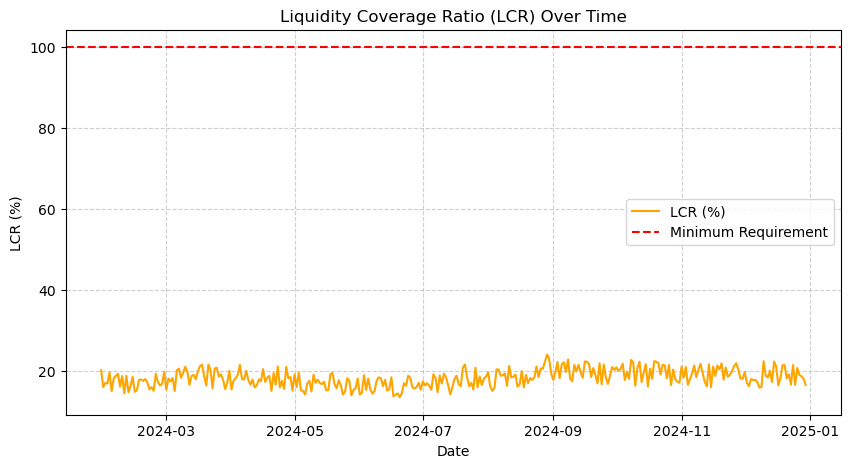

In [6]:
plt.figure(figsize=(10,5))
plt.plot(df_liq['Date'], df_liq['LCR'], label='LCR (%)', color='orange')
plt.axhline(y=100, color='r', linestyle='--', label='Minimum Requirement')
plt.title('Liquidity Coverage Ratio (LCR) Over Time')
plt.xlabel('Date')
plt.ylabel('LCR (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


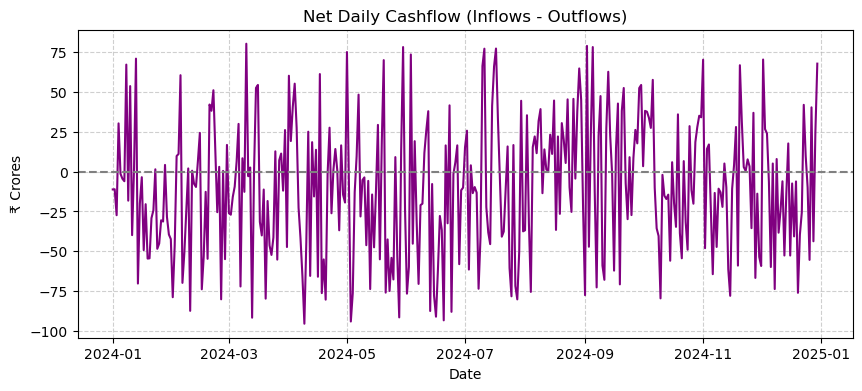

In [7]:
plt.figure(figsize=(10,4))
plt.plot(df_liq['Date'], df_liq['Net_Cashflow'], color='purple')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Net Daily Cashflow (Inflows - Outflows)')
plt.xlabel('Date')
plt.ylabel('₹ Crores')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


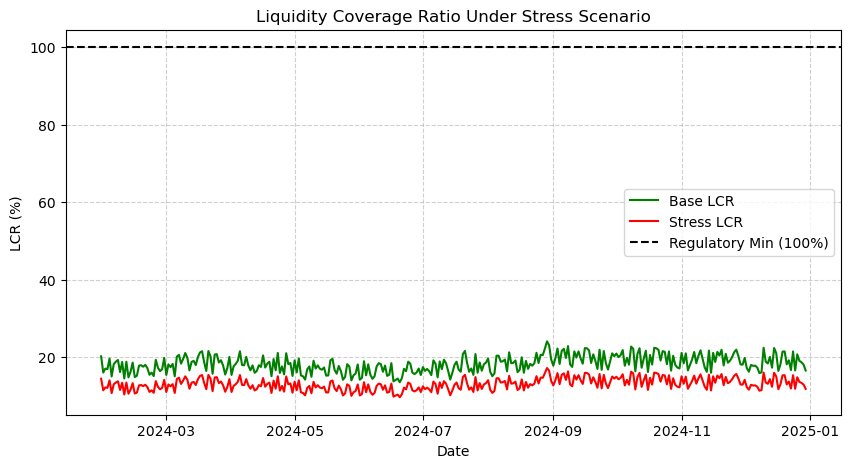

In [8]:
stress_df = df_liq.copy()
stress_df['Cash_Inflow'] *= 0.7
stress_df['Cash_Outflow'] *= 1.4
stress_df['Rolling_Outflow_30d'] = stress_df['Cash_Outflow'].rolling(window=30).sum()
stress_df['LCR'] = (stress_df['Liquid_Assets'] / stress_df['Rolling_Outflow_30d']) * 100

plt.figure(figsize=(10,5))
plt.plot(df_liq['Date'], df_liq['LCR'], label='Base LCR', color='green')
plt.plot(stress_df['Date'], stress_df['LCR'], label='Stress LCR', color='red')
plt.axhline(y=100, color='black', linestyle='--', label='Regulatory Min (100%)')
plt.title('Liquidity Coverage Ratio Under Stress Scenario')
plt.xlabel('Date')
plt.ylabel('LCR (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
